# Dull Razor

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [24]:
src = plt.imread(r'F:\TUhh\Sem 5\Project\practice\train2.jpg')
src=cv2.resize(src,(500,500))
print( src.shape )


(500, 500, 3)


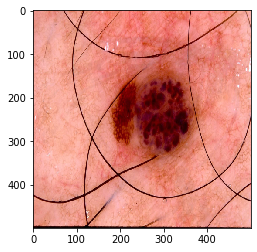

In [25]:
plt.imshow(src )
plt.show()

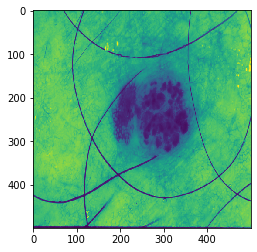

In [26]:
# Convert the original image to grayscale
grayScale = cv2.cvtColor( src, cv2.COLOR_RGB2GRAY )
plt.imshow(grayScale)
plt.show()
#cv2.imwrite('grayScale_sample1.jpg', grayScale, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

In [27]:
# Kernel for the morphological filtering
kernel = cv2.getStructuringElement(1,(17,17))

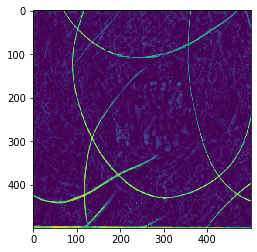

In [28]:
blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackhat)
plt.show()
#cv2.imwrite('blackhat_sample1.jpg', blackhat, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

In [31]:
print(blackhat)

[[  0   0   0 ...   0   0   0]
 [  0  10  15 ...  11  11   0]
 [  0  14  12 ...  13  10   0]
 ...
 [ 89 152 149 ...   6   4   1]
 [ 83 157 153 ... 103  91  76]
 [  3  33  31 ...  62  61  29]]


(500, 500)


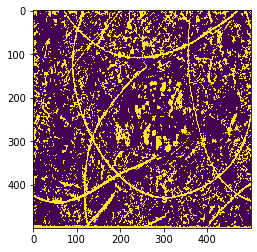

In [29]:
# intensify the hair countours in preparation for the inpainting 
# algorithm
ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
print( thresh2.shape )
plt.imshow(thresh2)
plt.show()
#cv2.imwrite('thresholded_sample1.jpg', thresh2, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

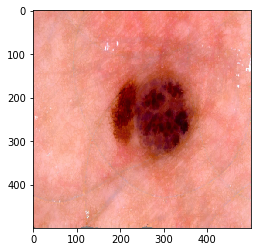

In [30]:
# inpaint the original image depending on the mask
dst = cv2.inpaint(src,thresh2,1,cv2.INPAINT_TELEA)
plt.imshow(dst)
plt.show()
#cv2.imwrite('C:\\SkinHairRemovalPython\\InPainted_sample1.jpg', dst, [int(cv2.IMWRITE_JPEG_QUALITY), 90])